In [89]:
import pandas as pd
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt

In [25]:
df=pd.read_excel("data_cleaning.xlsx",sheet_name='Usage',header=None)

In [26]:
df.head()

,0
0,3 PM Mon 24th-Mar-2014___0.384 kwh
1,5AM 15-Aug-2014___1.201 kwh
2,__8PM Thu 20-Mar-2014____1.523 kwh
3,6PM 23rd-Apr-2014___0.424 kwh
4,_1AM Friday 19th-Dec-2014___0.209 kwh


In [46]:
pattern=re.compile(r'(?P<time>\d+)\s?([AMP]{2})\s+[A-Za-z]*\s*(?P<day>\d+)(?:th|rd|st|nd)*-(?P<month>[A-Za-z]{3})-(?P<year>\d{4})_+(?P<kwh>\d+\.\d+)')

time=[]
am_pm=[]
day=[]
month=[]
year=[]
kwh=[]

for row in df.values.reshape(1,-1)[0]:
    result=pattern.findall(row)[0]
    time.append(result[0])
    am_pm.append(result[1])
    day.append(result[2])
    month.append(result[3])
    year.append(result[4])
    kwh.append(result[5])

clean_df=pd.DataFrame({'time':time,
                       'AM/PM':am_pm,
                       'day':day,
                       'month':month,
                       'year':year,
                       'kwh':kwh,
                       'raw_data':df.values.reshape(1,-1)[0]})

time_func= lambda x:pd.to_datetime(f"{x['year']}-{x['month']}-{x['day']} {x['time']}{x['AM/PM']}")
clean_df['full_time']=clean_df.apply(func= time_func,axis=1)

clean_df.head(10)

,time,AM/PM,day,month,year,kwh,raw_data,full_time
0,3,PM,24,Mar,2014,0.384,3 PM Mon 24th-Mar-2014___0.384 kwh,2014-03-24 15:00:00
1,5,AM,15,Aug,2014,1.201,5AM 15-Aug-2014___1.201 kwh,2014-08-15 05:00:00
2,8,PM,20,Mar,2014,1.523,__8PM Thu 20-Mar-2014____1.523 kwh,2014-03-20 20:00:00
3,6,PM,23,Apr,2014,0.424,6PM 23rd-Apr-2014___0.424 kwh,2014-04-23 18:00:00
4,1,AM,19,Dec,2014,0.209,_1AM Friday 19th-Dec-2014___0.209 kwh,2014-12-19 01:00:00
5,5,AM,19,Aug,2014,1.228,_5AM Tue 19th-Aug-2014___1.228 kwh,2014-08-19 05:00:00
6,12,PM,7,Jul,2014,1.296,12PM Mon 7th-Jul-2014___1.296 kwh,2014-07-07 12:00:00
7,7,AM,25,Nov,2014,0.437,7 AM Tue 25-Nov-2014__0.437 kwh,2014-11-25 07:00:00
8,8,AM,14,Aug,2014,0.523,_8AM 14-Aug-2014__0.523 kwh,2014-08-14 08:00:00
9,4,PM,25,Jan,2014,2.052,__4PM 25th-Jan-2014__2.052kwh,2014-01-25 16:00:00


In [47]:
time_series_data=clean_df.set_index('full_time')
time_series_data['kwh']=time_series_data['kwh'].astype('float')
time_series_data['week_day']=(time_series_data.index.weekday+1)
time_series_data.sort_index(ascending=True,inplace=True)
time_series_data.head()

,time,AM/PM,day,month,year,kwh,raw_data,week_day
full_time,,,,,,,,
2014-01-01 00:00:00,12,AM,1,Jan,2014,0.684,__12AM 1st-Jan-2014_0.684 kwh,3
2014-01-01 01:00:00,1,AM,1,Jan,2014,0.340,_1AM Wednesday 1st-Jan-2014__0.34 kwh,3
2014-01-01 02:00:00,2,AM,01,Jan,2014,0.332,2 AM Wed 01-Jan-2014_0.332 kwh,3
2014-01-01 03:00:00,3,AM,1,Jan,2014,0.396,_3AM Wednesday 1-Jan-2014___0.396 kwh,3
2014-01-01 04:00:00,4,AM,01,Jan,2014,0.388,__4AM 01-Jan-2014_0.388 kwh,3


In [48]:
time_series_kwh=time_series_data['kwh']
time_series_kwh.head()

full_time
2014-01-01 00:00:00    0.684
2014-01-01 01:00:00    0.340
2014-01-01 02:00:00    0.332
2014-01-01 03:00:00    0.396
2014-01-01 04:00:00    0.388
Name: kwh, dtype: float64

<IPython.core.display.Javascript object>


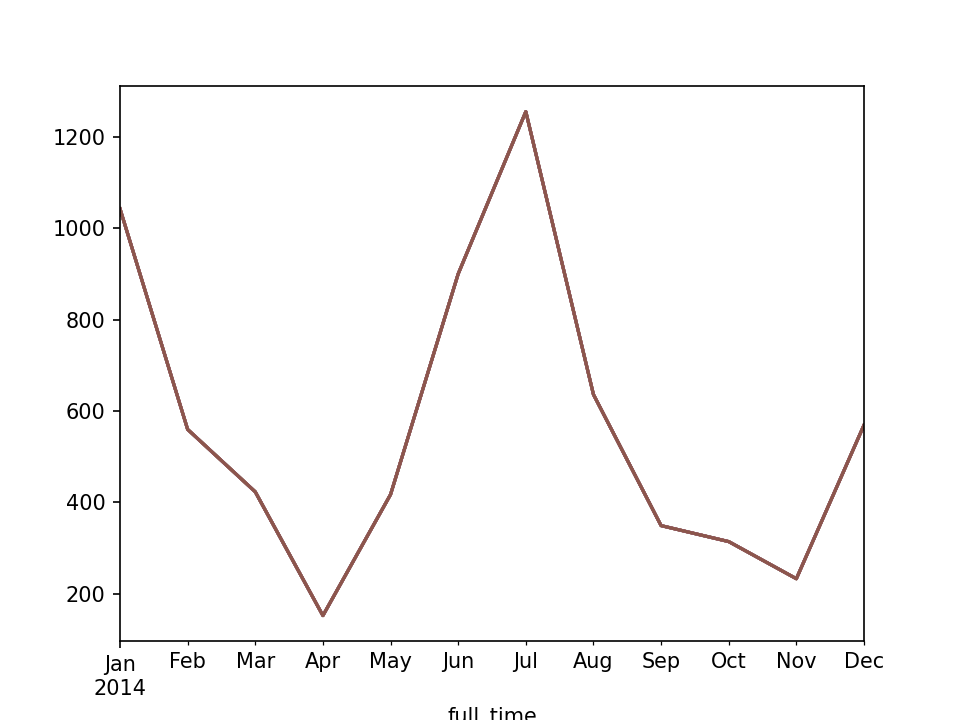

<AxesSubplot:xlabel='full_time'>

In [49]:
# Monthly fluctuation
%matplotlib notebook
time_series_kwh.resample('m').sum().plot()

<IPython.core.display.Javascript object>


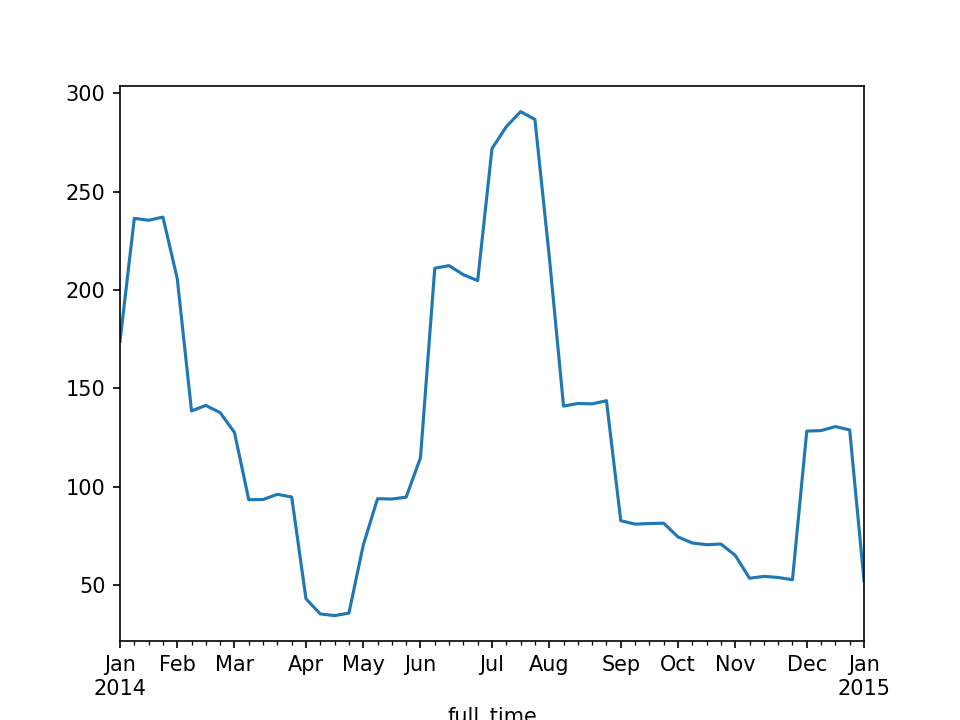

<AxesSubplot:xlabel='full_time'>

In [56]:
# Weekly fluctuation
%matplotlib notebook
time_series_kwh.resample('W').sum().plot()

<IPython.core.display.Javascript object>


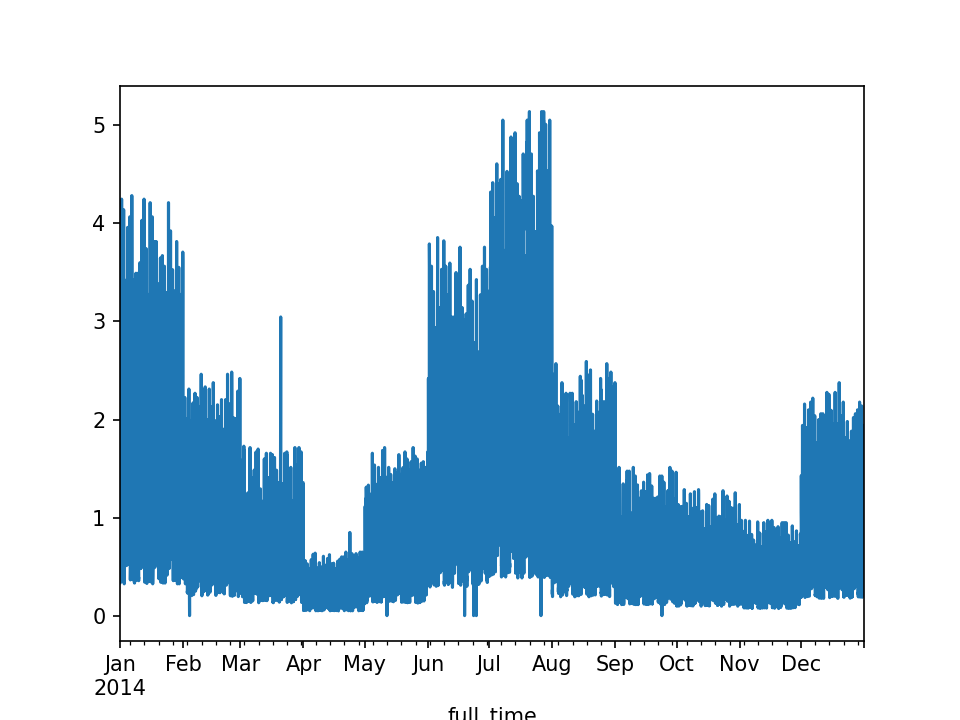

<AxesSubplot:xlabel='full_time'>

In [57]:
# Hourly fluctuation
%matplotlib notebook
time_series_kwh.resample('h').sum().plot()

## Questions

In [34]:
#1
round(time_series_kwh.mean(),3)

#Answer:B

0.782

In [86]:
#2
round(time_series_kwh['2014/02'].mean(),3)

#Answer:D

0.834

In [82]:
#3
time_series_data.groupby('week_day').mean()

#Answer:A

,kwh
week_day,
1,0.725894
2,0.724843
3,0.733699
4,0.746375
5,0.753666
6,0.890300
7,0.898601


In [87]:
#4
h4=[]
for i in range(8760-3):
    h4.append(time_series_kwh[i:i+4].sum())
pd.Series(h4).sort_values(ascending=False).iloc[0]

#Answer:A

17.237000000000002

In [41]:
#5
monthly_prices=pd.Series([0.2 , 0.19, 0.17, 0.18, 0.22, 0.27, 0.24, 0.19, 0.18, 0.15, 0.14,0.19],index=range(1,13),
                        name='monthly prices')
monthly_kwh=time_series_kwh.groupby(time_series_kwh.index.month).sum()
monthly_consumption=(monthly_kwh*monthly_prices).sum()
monthly_consumption

#Answer:B

1421.20577

In [81]:
#6

#year
yearly_consumption=time_series_kwh.sum()*0.21

#month
monthly_prices=pd.Series([0.2 , 0.19, 0.17, 0.18, 0.22, 0.27, 0.24, 0.19, 0.18, 0.15, 0.14,0.19],index=range(1,13),
                        name='monthly prices')
monthly_kwh=time_series_kwh.groupby(time_series_kwh.index.month).sum()
monthly_consumption=(monthly_kwh*monthly_prices).sum()

#hour
hourly_prices=pd.Series([0.1 , 0.1 , 0.1 , 0.1 , 0.15, 0.2 , 0.24, 0.24, 0.26, 0.2 , 0.2 ,
       0.26, 0.26, 0.2 , 0.24, 0.18, 0.15, 0.3 , 0.24, 0.24, 0.12, 0.11,
       0.1 , 0.1 ],name='hourly prices')

horly_kwh=time_series_kwh.groupby(time_series_kwh.index.hour).sum()
hourly_consumption=(horly_kwh*hourly_prices).sum()


print('yearly consumption:',yearly_consumption)
print('monthly consumption:',monthly_consumption)
print('hourly consumption:',hourly_consumption)

#Answer:C

yearly consumption: 1438.10394
monthly consumption: 1421.20577
hourly consumption: 1368.97647
